# Lecture 11 - Probabilistic Generative Models

So far we have focused on regression. We will begin to discuss **classification**.

Suppose we have training data from two classes, $C_1$ and $C_2$, and we would like to train a classifier to assign a label to incoming test points whether they belong to class $C_1$ or $C_2$.

There are *many* classifiers in the machine learning literature. We will cover a few in this course. Today we will focus on probabilistic generative approaches for classification.

* There are two types of probabilistic models: **discriminative** and **generative**.

A **discriminative** approach for classification is one in which we partition the feature space into regions for each class. Then, when we have a test point, we evaluate in which region it landed on and classify it accordingly.

A **generative** approach for classification is one in which we estimate the parameters for distributions that generate the data for each class. Then, when we have a test point, we can compute the posterior probability of that point belonging to each class and assign the point to the class with the highest posterior probability.

In [1]:
# from scipy.stats import multivariate_normal

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-colorblind')

In [2]:
def generateData(mean1, mean2, cov1, cov2, N1, N2):
    # We are generating data from two Gaussians to represent two classes
    # In practice, we would not do this - we would just have data from the problem we are trying to understand
    class1X = np.random.multivariate_normal(mean1, cov1, N1)
    class2X = np.random.multivariate_normal(mean2, cov2, N2)
    
    plt.scatter(class1X[:,0], class1X[:,1], c='r')
    plt.scatter(class2X[:,0], class2X[:,1])
    plt.xlabel('Feature 1'); plt.ylabel('Feature 2')
    plt.axis([-4,4,-4,4])
    return class1X, class2X

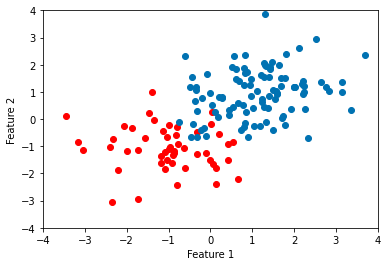

In [3]:
mean1 = [-1, -1]
mean2 = [1, 1]
cov1 = [[1,0],[0,1]]
cov2 = [[1,0],[0,1]]
N1 = 50
N2 = 100

class1X, class2X = generateData(mean1, mean2, cov1, cov2, N1, N2)

In the data we generated above, we have a "red" class and a "blue" class. When we are given a test sample, we will want to assign the label of red or blue.

We can compute the **posterior probability** for class $C_1$ as follows:

$$P(C_1|x) = \frac{P(x|C_1)P(C_1)}{P(x)}$$

Understanding that the two classes, red and blue, form a partition of all possible classes, then we can utilize the *Law of Total Probability*, and obtain:

$$P(C_1|x)=\frac{P(x|C_1)P(C_1)}{P(x|C_1)P(C_1) + P(x|C_2)P(C_2)}$$

Similarly, we can compute the posterior probability for class $C_2$:

$$P(C_2|x) = \frac{P(x|C_2)P(C_2)}{P(x|C_1)P(C_1) + P(x|C_2)P(C_2)}$$

Note that $P(C_1|x) + P(C_2|x) = 1$.

## Naive Bayes Classifier

Therefore, for a given test point $\mathbf{x}^*$, our decision rule is:

$$P(C_1|\mathbf{x}^*) \underset{C_2}{\overset{C_1}{\gtrless}} P(C_2|\mathbf{x}^*)$$

Using the Bayes' rule, we can further rewrite it as:
\begin{align}
\frac{P(\mathbf{x}^*|C_1)P(C_1)}{P(\mathbf{x}^*)} &\underset{C_2}{\overset{C_1}{\gtrless}} \frac{P(\mathbf{x}^*|C_2)P(C_2)}{P(\mathbf{x}^*)} \\
\iff P(\mathbf{x}^*|C_1)P(C_1) &\underset{C_2}{\overset{C_1}{\gtrless}} P(\mathbf{x}^*|C_2)P(C_2)
\end{align}

We assign $\mathbf{x}^*$ as belonging to class 1 if $p(\mathbf{x}^*|C_1) p(C_1) > p(\mathbf{x}^*|C_2) p(C_2)$, or assign $\mathbf{x}^*$ as belonging to class 2 if $p(\mathbf{x}^*|C_1) p(C_1) < p(\mathbf{x}^*|C_2) p(C_2)$.

This defines the **Naive Bayes Classifier**.

## Training a Generative Classifier

* So, **to train the classifier**, what we need to do is to determine the parametric forms and the associated parameters for $p(x|C_1)$, $p(x|C_2)$, $P(C_1)$ and $p(C_2)$.

For example, we can assume that the data samples coming from either $C_1$ and $C_2$ are distributed according to Gaussian distributions. In this case, 

$$p(x|C_k) = \frac{1}{(2\pi)^{1/2} |\Sigma_k|^{1/2}}\exp\left\{-\frac{1}{2}(\mathbf{x}-\mathbf{\mu}_k)^T\Sigma_k^{-1}(\mathbf{x}-\mathbf{\mu}_k)\right\}, \forall k=\{1,2\}$$

* We can consider any distributional form we want.

What about the $P(C_1)$ and $P(C_2)$?

* We can consider the relative frequency of each class, that is, $P(C_i) = \frac{N_i}{N}$, where $N_i$ is the number of points in class $C_i$ and $N$ is the total number of samples.

### Parameter Estimation

For simplification, let's consider the covariance matrix $\Sigma_k$ for $k=1,2$ to be **isotropic** matrices, that is, the covariance matrix is diagonal and the element along the diagonal is the same, or: $\Sigma_k = \sigma_k^2\mathbf{I}$.

* What are the parameters? The mean and covariance of the Gaussian distribution for both classes.

Given the assumption of the Gaussian form, how would you estimate the parameters for $p(x|C_1)$ and $p(x|C_2)$? We can use **maximum likelihood estimate** for the mean and covariance, because we are looking for the parameters of the distributions that *maximize* the data likelihood!

The MLE estimate for the mean of class $C_k$ is:

$$\mathbf{\mu}_{k,\text{MLE}} = \frac{1}{N_k}\sum_{n\in C_k} \mathbf{x}_n$$

where $N_k$ is the number of training data points that belong to class $C_k$.

To solve for the covariance of each class distribution $\Sigma_k = \sigma_k^2\mathbf{I}$, we reduce to only finding one value, $\sigma^2_k$. 

The MLE estimate for the variance $\sigma^2_k is:

$$\sigma^2_{k,\text{MLE}} = \frac{1}{N_k}\sum_{n\in C_k} (\mathbf{x}_n - \mathbf{\mu}_{k,\text{MLE}}) (\mathbf{x}_n - \mathbf{\mu}_{k,\text{MLE}})^T$$

(In practice, if we want to estimate an entire covariance matrix, we would have to take the derivative of the log-likelihood function with respect to every entry in the covariance matrix.)

We can determine the values for $p(C_1)$ and $p(C_2)$ from the number of data points in each class:

$$p(C_k) = \frac{N_k}{N}$$

where $N$ is the total number of data points.

In [9]:
class1X.shape

(50, 2)

In [10]:
# Estimate the mean and covariance for each class from the training data

mu1 = np.mean(class1X, axis=0)
print(mu1)

cov1 = np.cov(class1X.T) #by default the cov function takes a data matrix of size 2xN, where 2 is the dimensions
print(cov1)

mu2 = np.mean(class2X, axis=0)
print(mu2)

cov2 = np.cov(class2X.T) #by default the cov function takes a data matrix of size 2xN, where 2 is the dimensions
print(cov2)

# estimate the prior for each class
pC1 = class1X.shape[0]/(class1X.shape[0] + class2X.shape[0])
print('Probability of class 1:',pC1)

pC2 = class2X.shape[0]/(class1X.shape[0] + class2X.shape[0])
print('Probability of class 2:',pC2)

[-1.01571548 -1.0718555 ]
[[ 0.94856854 -0.09396467]
 [-0.09396467  0.64854352]]
[1.11191478 0.94978859]
[[0.93956064 0.22173447]
 [0.22173447 0.8022431 ]]
Probability of class 1: 0.3333333333333333
Probability of class 2: 0.6666666666666666


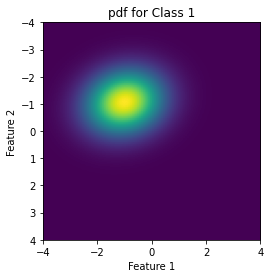

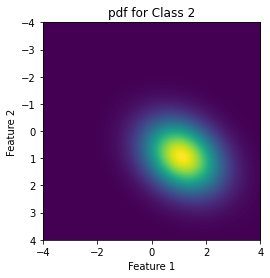

In [11]:
# Compute a grid of values for x and y 
x = np.linspace(-4, 4, 100)
y = np.linspace(-4, 4, 100)
xm, ym = np.meshgrid(x, y)
X = np.dstack([xm,ym])

# Let's plot the probability data likelihood (density function (pdf)) for each class
y1 = multivariate_normal.pdf(X, mean=mu1, cov=cov1)
y2 = multivariate_normal.pdf(X, mean=mu2, cov=cov2)

plt.imshow(y1, extent=[-4,4,4,-4]); plt.xlabel('Feature 1'); plt.ylabel('Feature 2'); plt.title('pdf for Class 1'); plt.show()
plt.imshow(y2, extent=[-4,4,4,-4]); plt.xlabel('Feature 1'); plt.ylabel('Feature 2'); plt.title('pdf for Class 2'); plt.show()

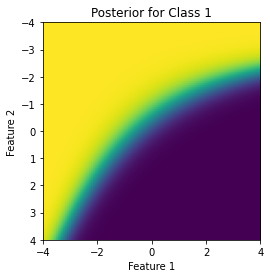

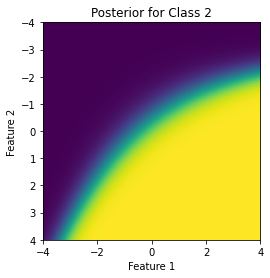

In [12]:
# Let's take a look at the posterior distributions: they represent our classification decision

pos1 = (y1*pC1)/(y1*pC1 + y2*pC2) # using the Bayes' rule (see the whiteboard notes)
pos2 = (y2*pC2)/(y1*pC1 + y2*pC2) # using the Bayes' rule (see the whiteboard notes)

plt.imshow(pos1, extent=[-4,4,4,-4]);plt.xlabel('Feature 1'); plt.ylabel('Feature 2'); plt.title('Posterior for Class 1')
plt.show()
plt.imshow(pos2, extent=[-4,4,4,-4]);plt.xlabel('Feature 1'); plt.ylabel('Feature 2'); plt.title('Posterior for Class 2')
plt.show()

The posterior is going to determine the regions in the features space to which its value is higher than the other classes.

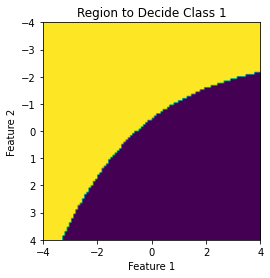

In [13]:
# Look at the decision boundary:

plt.imshow(pos1>pos2, extent=[-4,4,4,-4])
plt.xlabel('Feature 1') 
plt.ylabel('Feature 2')
plt.title('Region to Decide Class 1');

Suppose that we have the point $$[1,1]$$

In [16]:
?multivariate_normal

In [28]:
y1_newpoint = multivariate_normal.pdf([1,1],mean=mu1, cov=cov1)

y2_newpoint = multivariate_normal.pdf([1,1], mean=mu2, cov=cov2)

In [29]:
y1_newpoint, y2_newpoint

(0.0004241607796223462, 0.18761051638386636)

The posterior probability is then:

In [30]:
pos1 = (y1_newpoint*pC1)/(y1_newpoint*pC1 + y2_newpoint*pC2)
pos2 = (y2_newpoint*pC2)/(y1_newpoint*pC1 + y2_newpoint*pC2)

if pos1>pos2:
    print('Assign it to class 1 with probability ',pos1,'and confidence prob.',y1_newpoint)
else:
    print('Assign it to class 2 with probability ',pos2,'and confidence prob.',y2_newpoint)

Assign it to class 2 with probability  0.9988708473130806 and confidence prob. 0.18761051638386636


What about the point $[10,10]$? That lays way outside the region where we have samples:

In [21]:
y1_newpoint = multivariate_normal.pdf([10,10],mean=mu1, cov=cov1)

y2_newpoint = multivariate_normal.pdf([10,10], mean=mu2, cov=cov2)

In [22]:
y1_newpoint, y2_newpoint

(1.8913598119743637e-79, 1.054195308869829e-33)

The posterior probability is then:

In [27]:
pos1 = (y1_newpoint*pC1)/(y1_newpoint*pC1 + y2_newpoint*pC2)
pos2 = (y2_newpoint*pC2)/(y1_newpoint*pC1 + y2_newpoint*pC2)

if pos1>pos2:
    print('Assign it to class 1 with probability ',pos1,'and confidence prob.',y1_newpoint)
else:
    print('Assign it to class 2 with probability ',pos2,'and confidence prob.',y2_newpoint)

Assign it to class 2 with probability  1.0 and confidence prob. 1.054195308869829e-33


We can still make a classification, but we will not be confident in that decision.